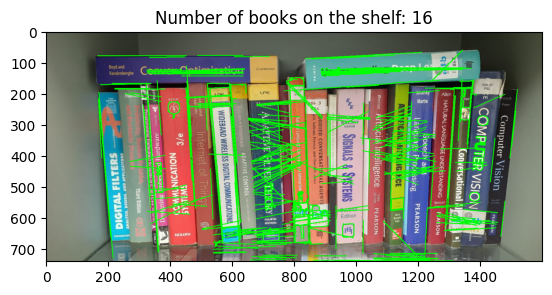

Number of books on the shelf: 16


In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def count_books_sobel_hough(image_path, min_contour_area=500):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel edge detector
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the gradients after taking the absolute value
    gradient_magnitude = np.sqrt(np.abs(sobel_x)*2 + np.abs(sobel_y)*2)
    gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

    # Apply Probabilistic Hough Line Transform on the gradient magnitude
    edges = cv2.Canny(gradient_magnitude, 100, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # Draw detected lines on the image (optional, for visualization)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (assumed to be noise)
    valid_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

    # Draw the contours on the original image (optional, for visualization)
    cv2.drawContours(image, valid_contours, -1, (0, 255, 0), 2)

    # Save the result image
    result_path = 'result_image_sobel_hough.jpg'
    cv2.imwrite(result_path, image)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Number of books on the shelf: {len(valid_contours)}')
    plt.show()

    return len(valid_contours)

# Example usage
image_path = '/kaggle/input/booksshlef/BookCount_1.jpeg'
min_contour_area = 700  # Adjust this value based on your specific images
book_count = count_books_sobel_hough(image_path, min_contour_area)
print(f'Number of books on the shelf: {book_count}')